In [79]:
# imports
from utils import *
import matplotlib.style as style
style.use('seaborn-colorblind')

In [31]:
# read the configuration file and initialize random generators
cfg = read_config('configfiles/config.yaml')
seeds = read_config('configfiles/seed_config.yaml')
#initalize_random_generators(seeds)

# Data Loading

In [200]:
#### with SMOTE ####

## Hyperparamter Search Results ## 
hyper_smote  = pd.DataFrame()
# load seeds
for j in range(10): 
    results = pd.read_pickle('cv_results_smote/cv_results_seed{}'.format(j))
    hyper_smote = hyper_smote.append(results)

## Best Models ##
best_models_smote = pd.read_pickle('best_models_smote')
best_models_smote['balanced'] = 'true'

## Prediction ##
final_pred_smote = pd.read_pickle('final_prediction')

    
#### w/o SMOTE ####

## Hyperparamter Search Results ## 
hyper_wo  = pd.DataFrame()
# load seeds
for j in range(10): 
    results = pd.read_pickle('cv_results_wo_smote/cv_results_seed{}'.format(j))
    hyper_wo = hyper_wo.append(results)

## Best Models ##
best_models_wo = pd.read_pickle('best_models_wo_smote')
best_models_wo['balanced'] = 'false'

## Prediction ##
final_pred_wo = pd.read_pickle('final_prediction_wo_smote')

In [4]:
# extract y_test
# load dataset 
allData = load_data(cfg['dataset']) #RT: added frac to speed-up trials and debugging
_, _, _, y_test = data_prep(allData, cfg['features'], cfg['target'],
                                       randomState=seeds['dprep_seed'], 
                                       testSize=cfg['frac_tst'], 
                                       trainSize=cfg['train_size'])


# Plots

## Confusion Matrix  Balanced vs Unbalanced data

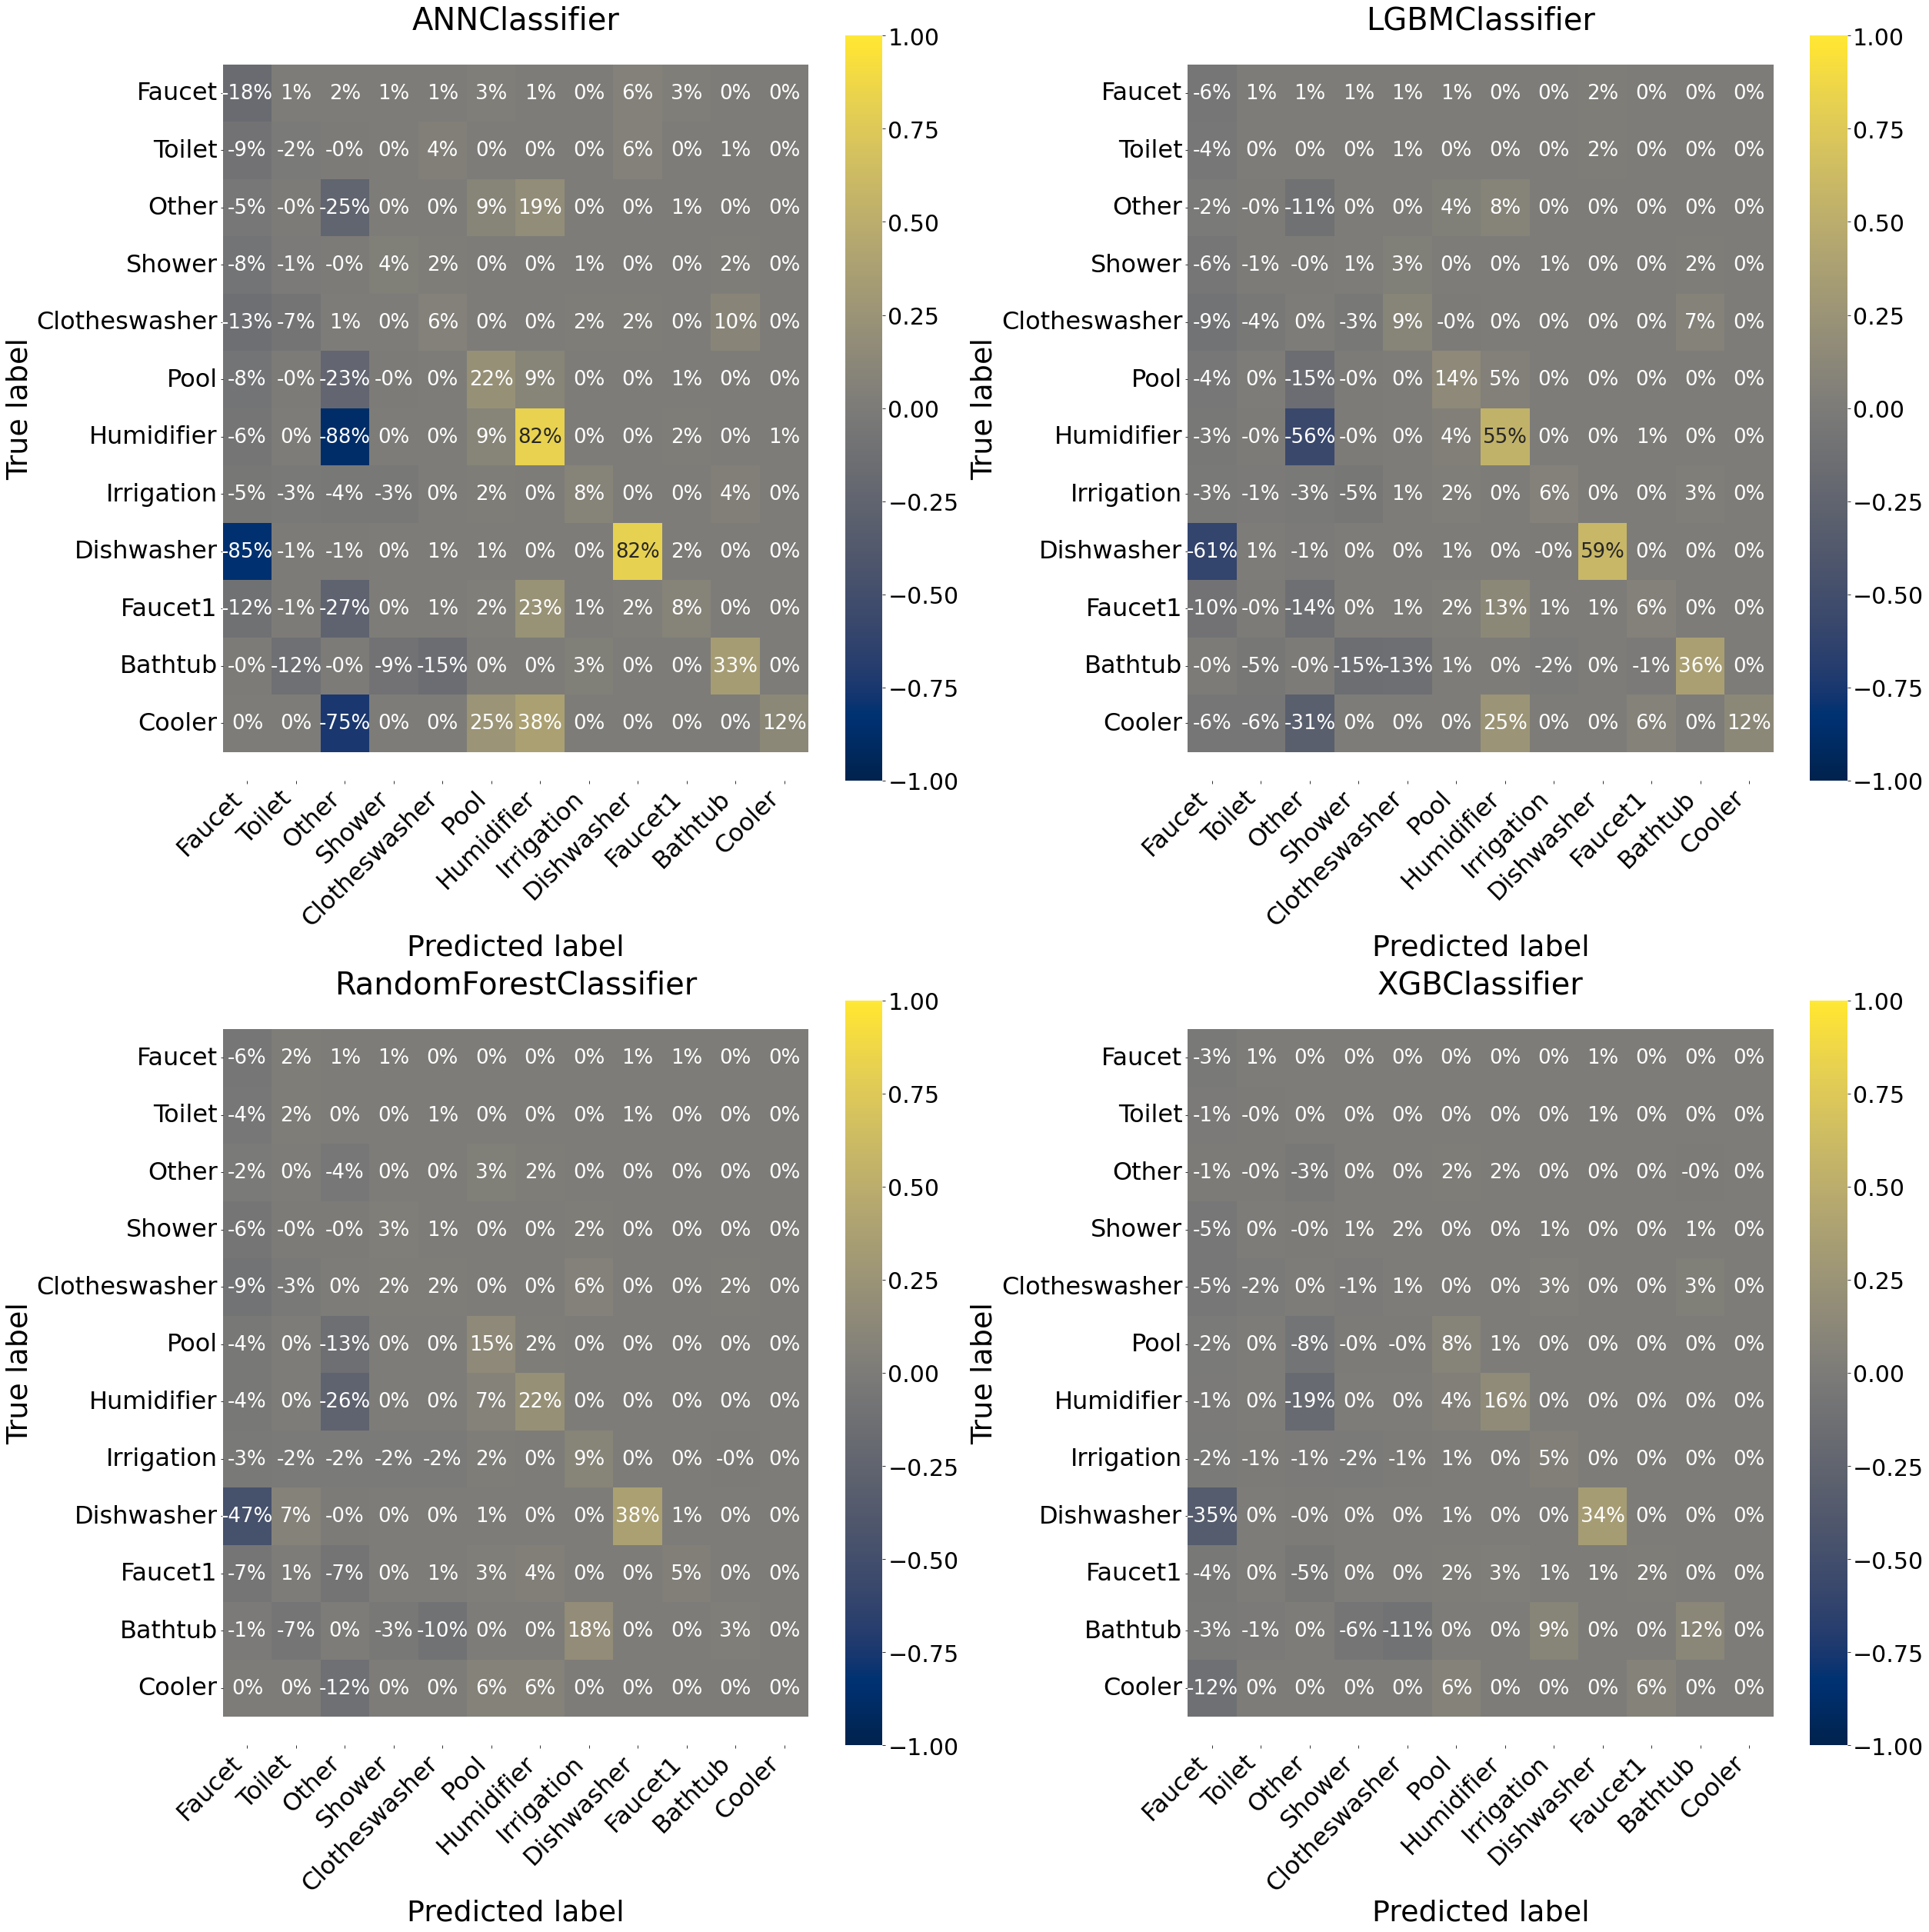

In [177]:
fig, axs = plt.subplots(2,2, figsize=(35,35))
axs = axs.ravel()

for i,j in enumerate(final_pred_smote.columns):

    # compute normalized confusion matrix
    cmNorm_wo = confusion_matrix(y_test, final_pred_wo[j], normalize = 'true')
    cmNorm_smote = confusion_matrix(y_test, final_pred_smote[j], normalize = 'true')
    
    cmNorm = cmNorm_smote - cmNorm_wo
    
    # Sorting fixturers in decreasing order of event counts
    fixtures,counts = np.unique(y_test, return_counts=True)
    count_sort_ind = np.argsort(-counts)
    # create  and plot confusion matrix
    heatmap = sns.heatmap(cmNorm[:, count_sort_ind][count_sort_ind], annot=True, fmt=".0%", annot_kws={"size": 26},
                          cmap="cividis", ax=axs[i],vmin = -1, vmax=1)
    cbar = axs[i].collections[0].colorbar
    cbar.ax.tick_params(labelsize=30)
    heatmap.yaxis.set_ticklabels(fixtures[count_sort_ind], rotation=0, ha='right', fontsize=32)
    heatmap.xaxis.set_ticklabels(fixtures[count_sort_ind], rotation=45, ha='right', fontsize=32)
    axs[i].set_ylabel('True label', fontsize=38)
    axs[i].set_xlabel('Predicted label', fontsize=38)
    b, t = axs[i].set_ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    axs[i].set_ylim(b, t) # update the ylim(bottom, top) values
    axs[i].set_title(j, fontsize=40)
plt.tight_layout()
#plt.suptitle('Confusion Matrix – Difference Balanced vs. Unbalanced Data',y=0.92, fontsize=34)
#plt.savefig('/Users/Marie-Philine/Documents/SWN/NIWM/figures/cm_difference.pdf')

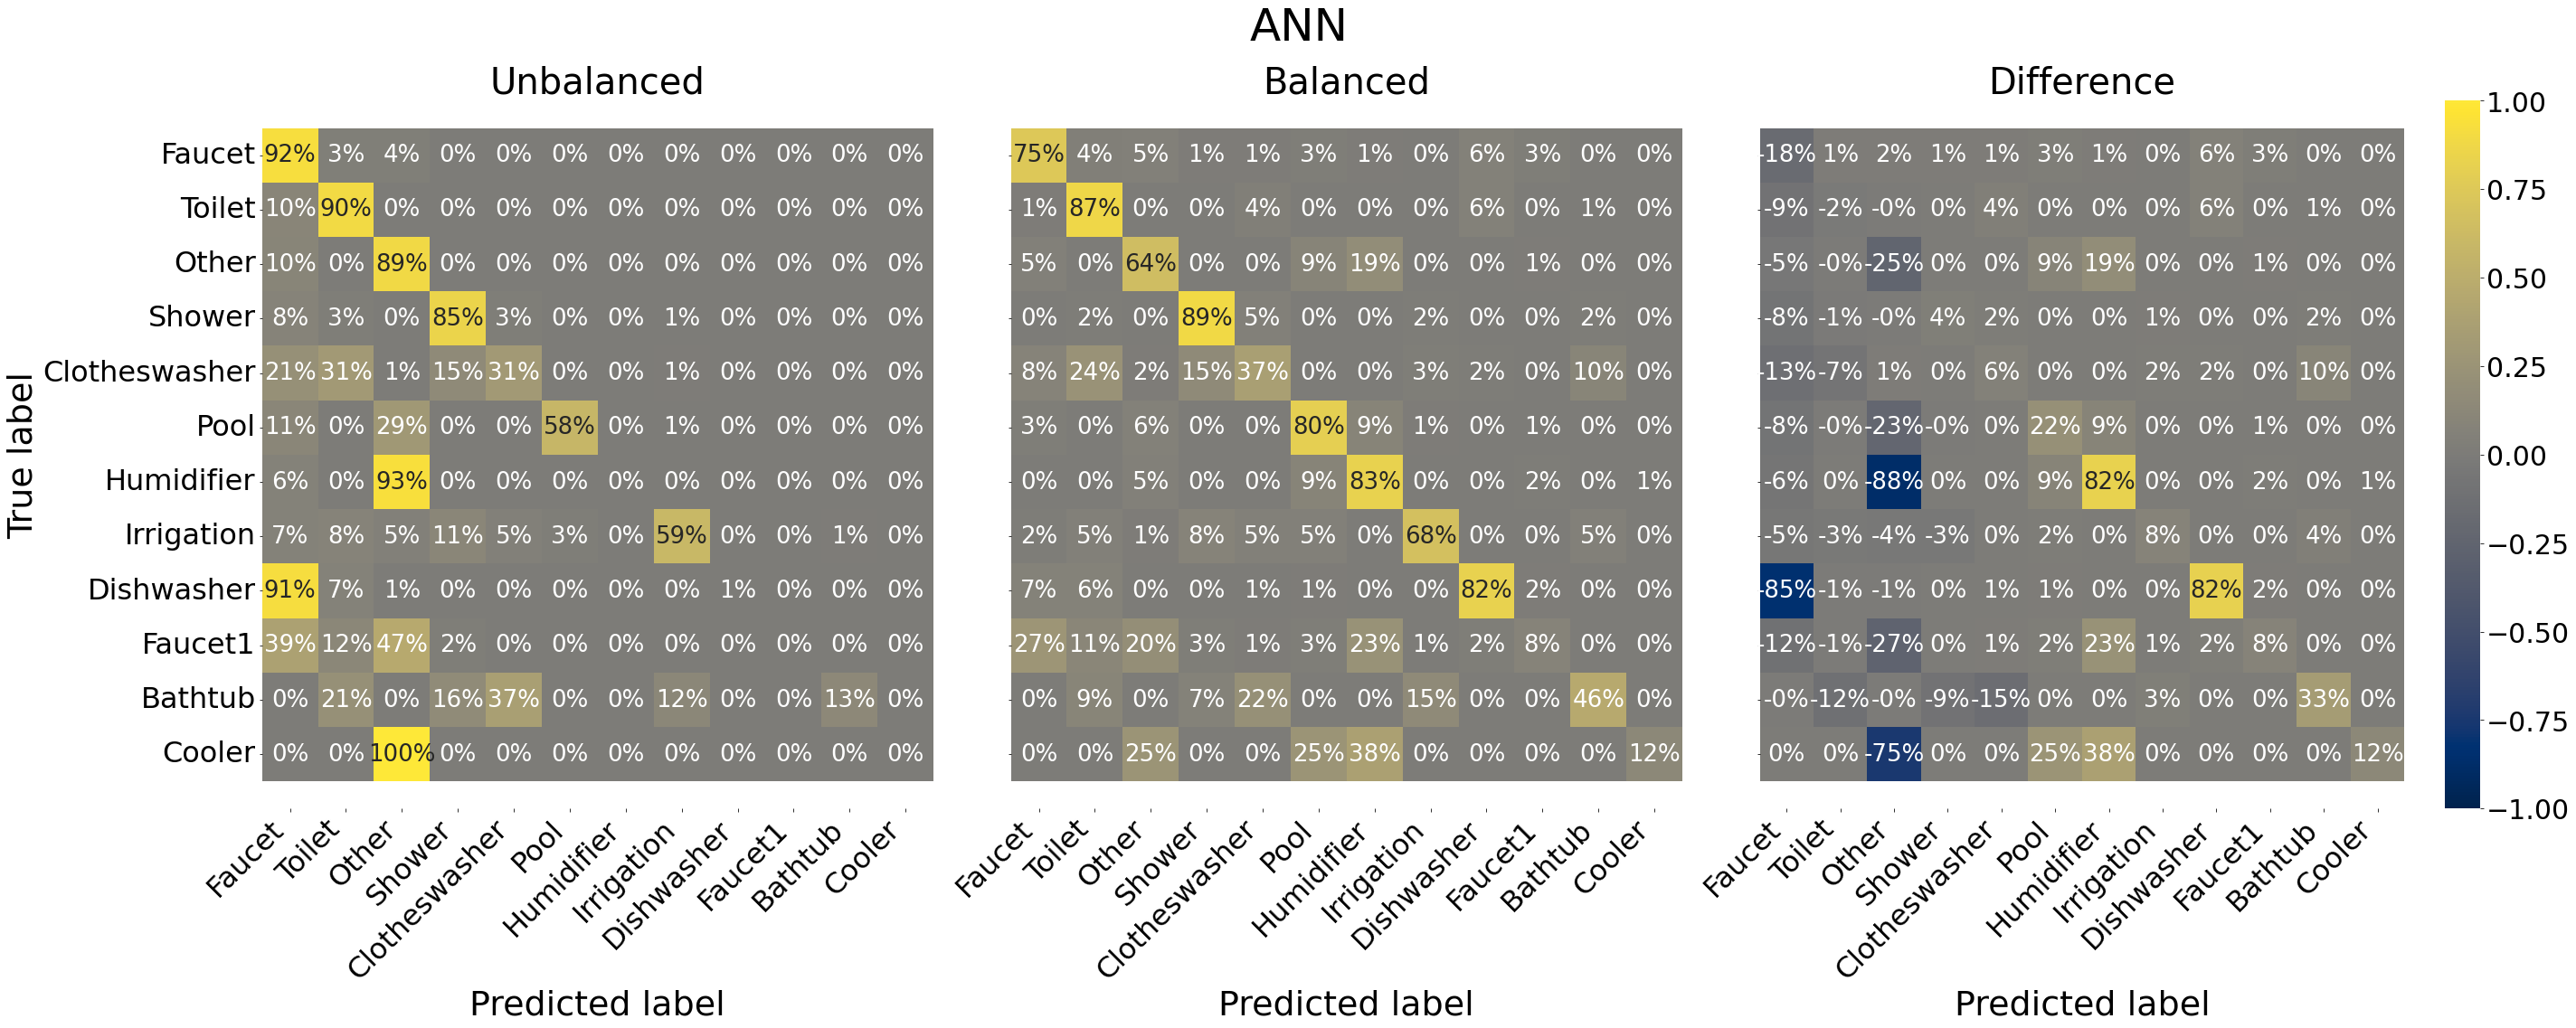

In [193]:
fig, axs = plt.subplots(1,3, figsize=(40,15), sharey=True, gridspec_kw={'width_ratios': [1,1,1.2]})

# compute normalized confusion matrix
cmNorm_wo = confusion_matrix(y_test, final_pred_wo['ANNClassifier'], normalize = 'true')
cmNorm_smote = confusion_matrix(y_test, final_pred_smote['ANNClassifier'], normalize = 'true')

cmNorm = cmNorm_smote - cmNorm_wo

# Sorting fixturers in decreasing order of event counts
fixtures,counts = np.unique(y_test, return_counts=True)
count_sort_ind = np.argsort(-counts)


# without SMOTE
heatmap1 = sns.heatmap(cmNorm_wo[:, count_sort_ind][count_sort_ind], annot=True, fmt=".0%", annot_kws={"size": 26},
                      cmap="cividis", ax=axs[0],vmin = -1, vmax=1, cbar=False)
heatmap1.yaxis.set_ticklabels(fixtures[count_sort_ind], rotation=0, ha='right', fontsize=32)
heatmap1.xaxis.set_ticklabels(fixtures[count_sort_ind], rotation=45, ha='right', fontsize=32)
axs[0].set_ylabel('True label', fontsize=38)
axs[0].set_xlabel('Predicted label', fontsize=38)
b, t = axs[0].set_ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
axs[0].set_ylim(b, t) # update the ylim(bottom, top) values
axs[0].set_title('Unbalanced', fontsize=40)


# with SMOTE
heatmap2 = sns.heatmap(cmNorm_smote[:, count_sort_ind][count_sort_ind], annot=True, fmt=".0%", annot_kws={"size": 26},
                      cmap="cividis", ax=axs[1],vmin = -1, vmax=1, cbar=False)
heatmap2.yaxis.set_ticklabels(fixtures[count_sort_ind], rotation=0, ha='right', fontsize=32)
heatmap2.xaxis.set_ticklabels(fixtures[count_sort_ind], rotation=45, ha='right', fontsize=32)
#axs[1].set_ylabel('True label', fontsize=38)
axs[1].set_xlabel('Predicted label', fontsize=38)
b, t = axs[1].set_ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
axs[1].set_ylim(b, t) # update the ylim(bottom, top) values
axs[1].set_title('Balanced', fontsize=40)



# Difference
heatmap3 = sns.heatmap(cmNorm[:, count_sort_ind][count_sort_ind], annot=True, fmt=".0%", annot_kws={"size": 26},
                      cmap="cividis", ax=axs[2],vmin = -1, vmax=1)
cbar = axs[2].collections[0].colorbar
cbar.ax.tick_params(labelsize=30)
heatmap3.yaxis.set_ticklabels(fixtures[count_sort_ind], rotation=0, ha='right', fontsize=32)
heatmap3.xaxis.set_ticklabels(fixtures[count_sort_ind], rotation=45, ha='right', fontsize=32)
#axs[2].set_ylabel('True label', fontsize=38)
axs[2].set_xlabel('Predicted label', fontsize=38)
b, t = axs[2].set_ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
axs[2].set_ylim(b, t) # update the ylim(bottom, top) values
axs[2].set_title('Difference', fontsize=40)

plt.tight_layout()
plt.suptitle('ANN',fontsize=50, y=1.05)
#plt.savefig('/Users/Marie-Philine/Documents/SWN/NIWM/figures/cm_RF.pdf')

## Hyperparameter – Computational time

In [91]:
hyper_smote['balanced'] = 'true'
hyper_wo['balanced'] = 'false'

hyper_all = pd.concat([hyper_smote, hyper_wo])

best_models_all = pd.concat([best_models_smote, best_models_wo])
best_models_all['position'] = [-0.2, 0.8, 1.8, 2.8,0.2, 1.2, 2.2, 3.2]
best_models_all['label'] = 'best_model'

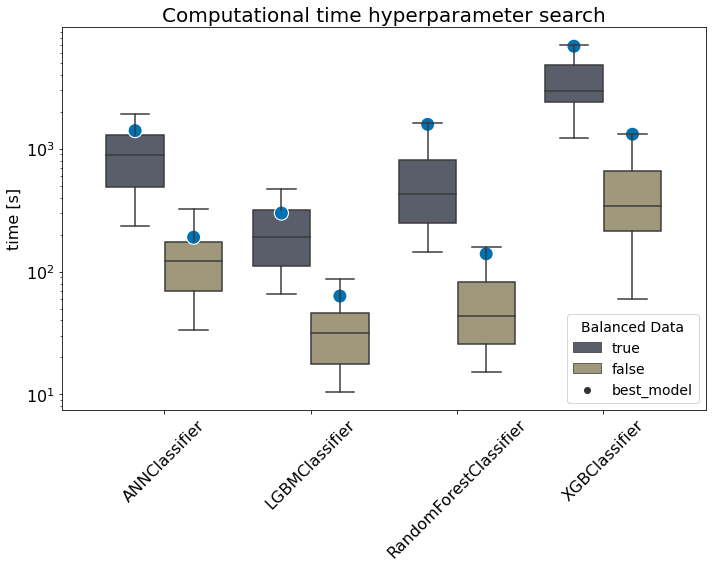

In [198]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax = sns.boxplot(x='algorithm', y='time',hue='balanced' ,data = hyper_all, showfliers=False, 
                 order=['ANNClassifier',  'LGBMClassifier', 'RandomForestClassifier', 'XGBClassifier'], 
                palette='cividis')

ax = sns.scatterplot(x='position', y='time',data = best_models_all, s=200, style='label',   palette='viridis')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Balanced Data', fontsize=14, loc=4)
plt.setp(ax.get_legend().get_title(), fontsize='14')

ax.tick_params(axis='x', rotation=45, labelsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=16)

ax.set_title('Computational time hyperparameter search',fontsize=20)
ax.set_ylabel('time [s]', size=16) 
ax.xaxis.label.set_visible(False)

plt.yscale('log')
plt.tight_layout()
#plt.savefig('/Users/Marie-Philine/Documents/SWN/NIWM/figures/boxplot_time_smote.pdf')

## Final models F1 score

In [95]:
f1_all = pd.DataFrame(index = best_models_smote.index, columns=['algorithm', 'micro_smote', 'micro_wo_smote', 
                                                                'macro_smote', 'macro_wo_smote', 
                                                               'weigh_smote', 'weigh_wo_smote'])
for index, algorithm in enumerate(final_pred_smote.columns):
    # f1 micro
    micro_smote = f1_score(y_test, final_pred_smote[algorithm], average='micro')
    micro_wo = f1_score(y_test, final_pred_wo[algorithm], average='micro')
    # f1 macro 
    macro_smote = f1_score(y_test, final_pred_smote[algorithm], average='macro')
    macro_wo = f1_score(y_test, final_pred_wo[algorithm], average='macro')
    # f1 weighted
    weigh_smote = f1_score(y_test, final_pred_smote[algorithm], average='weighted')
    weigh_wo = f1_score(y_test, final_pred_wo[algorithm], average='weighted')
    f1_all.loc[index] = (algorithm,  micro_smote,  micro_wo, macro_smote, macro_wo, weigh_smote, weigh_wo)
    

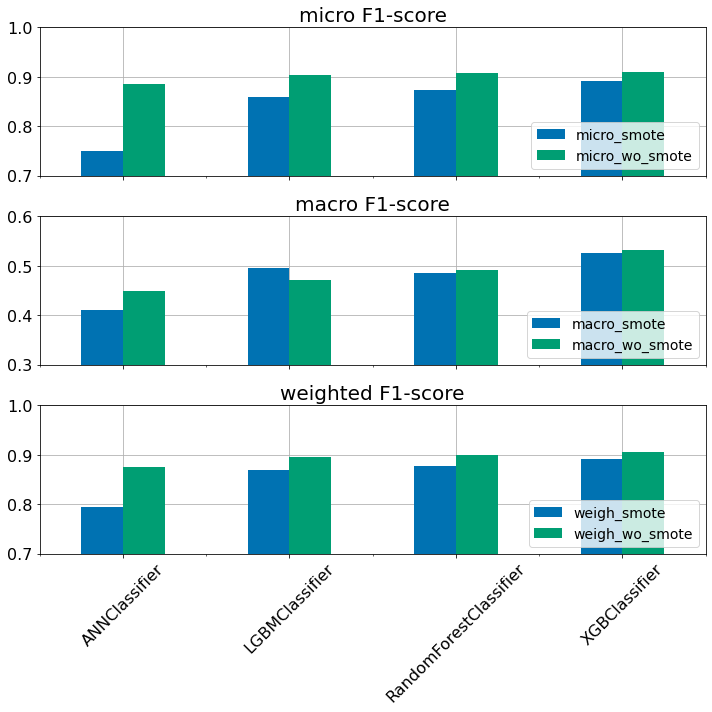

In [186]:
col = [['algorithm',  'micro_smote', 'micro_wo_smote'], 
       ['algorithm' ,'macro_smote','macro_wo_smote'], 
       ['algorithm',  'weigh_smote', 'weigh_wo_smote']]
ylim = [(0.7, 1),(0.3, 0.6), (0.7, 1) ]
title = ['micro', 'macro',  'weighted']

fig, axs = plt.subplots(3,1, sharex=True, figsize=(10, 10))

for i in range(3):
    f1_all[col[i]].plot(kind='bar', stacked=False, x='algorithm', legend = True, ax = axs[i])
    
    axs[i].set_ylim(ylim[i])
    axs[i].set_axisbelow(True)
    axs[i].grid()
    axs[i].legend(loc=4, fontsize=14)
    axs[i].tick_params(axis='y', rotation=0, labelsize=16)
    axs[i].set_title( title[i]+' F1-score', fontsize=20)
    
axs[i].tick_params(axis='x', rotation=45, labelsize=16)
axs[i].xaxis.label.set_visible(False)
plt.tight_layout()

#plt.savefig('/Users/Marie-Philine/Documents/SWN/NIWM/figures/f1_score_pred.pdf' )